Text(0.5, 1.0, 'Reconstructed Image Au 80.7 keV')

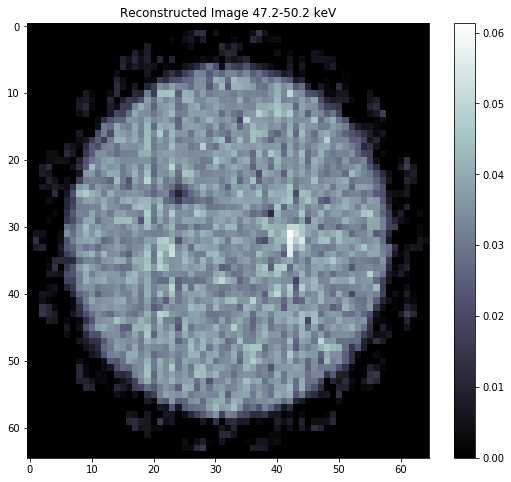

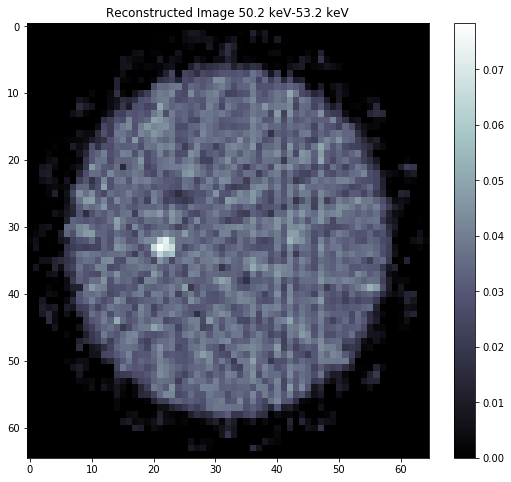

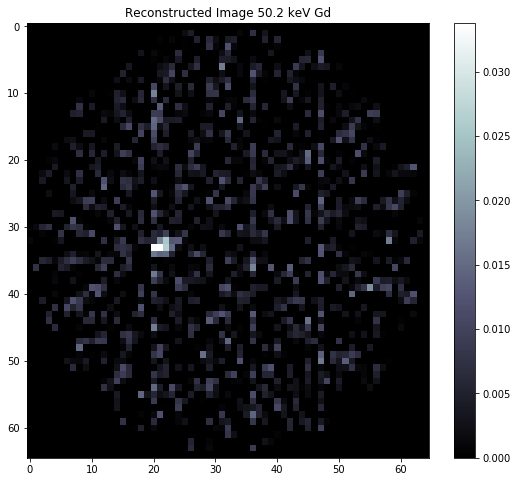

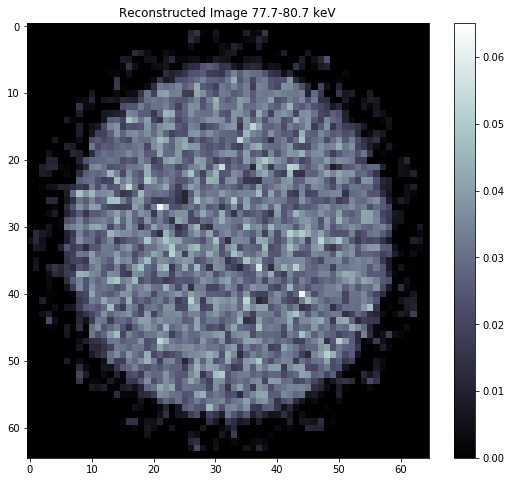

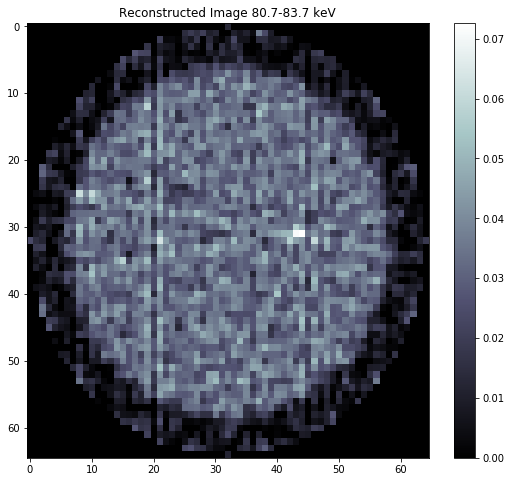

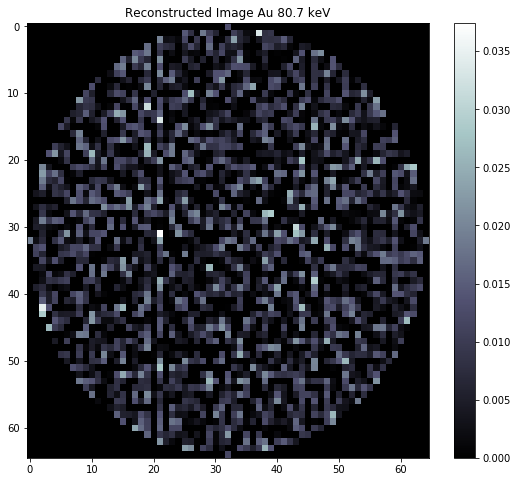

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure
from skimage.transform import iradon


#airscans
airscan_counts_502_3 = sum(genfromtxt("Desktop/CT imaging/17-5-2021/Air scan.mca", skip_header=int(round((50.2-bin_width)*550/81+12)),max_rows=int(round(bin_width*550/81))))
airscan_counts_5023 = sum(genfromtxt("Desktop/CT imaging/17-5-2021/Air scan.mca", skip_header=int(round((50.2+bin_width)*550/81+12)),max_rows=int(round(bin_width*550/81))))
airscan_counts_807_3 = sum(genfromtxt("Desktop/CT imaging/17-5-2021/Air scan.mca", skip_header=int(round((80.7-bin_width)*550/81+12)),max_rows=int(round(bin_width*550/81))))
airscan_counts_8073 = sum(genfromtxt("Desktop/CT imaging/17-5-2021/Air scan.mca", skip_header=int(round((80.7-bin_width)*550/81+12)),max_rows=int(round(bin_width*550/81))))

tot_counts_502_3=[];tot_counts_5023=[];tot_counts_807_3=[];tot_counts_8073=[]
avg_counts_502_3=[];avg_counts_5023=[];avg_counts_807_3=[];avg_counts_8073=[]

for i in np.arange(0,360,20):
    for j in np.arange(1,66):
        counts = genfromtxt("Desktop/CT imaging/17-5-2021/angle_{:d}_acq_{:02d}.mca".format(i,j), skip_header=int(round((50.2-bin_width)*550/81+12)),max_rows=int(round(bin_width*550/81)))
        avg_counts_502_3.append(-np.log(sum(counts)/airscan_counts_502_3))
        counts=0
    tot_counts_502_3.append(avg_counts_502_3)
    avg_counts_502_3=[]   
    
for i in np.arange(0,360,20):
    for j in np.arange(1,66):
        counts = genfromtxt("Desktop/CT imaging/17-5-2021/angle_{:d}_acq_{:02d}.mca".format(i,j), skip_header=int(round((50.2+bin_width)*550/81+12)),max_rows=int(round(bin_width*550/81)))
        avg_counts_5023.append(-np.log(sum(counts)/airscan_counts_5023))
        counts=0
    tot_counts_5023.append(avg_counts_5023)
    avg_counts_5023=[]
    
for i in np.arange(0,360,20):
    for j in np.arange(1,66):
        counts = genfromtxt("Desktop/CT imaging/17-5-2021/angle_{:d}_acq_{:02d}.mca".format(i,j), skip_header=int(round((80.7-bin_width)*550/81+12)),max_rows=int(round(bin_width*550/81)))
        avg_counts_807_3.append(-np.log(sum(counts)/airscan_counts_807_3))
        counts=0
    tot_counts_807_3.append(avg_counts_807_3)
    avg_counts_807_3=[]   
    
for i in np.arange(0,360,20):
    for j in np.arange(1,66):
        counts = genfromtxt("Desktop/CT imaging/17-5-2021/angle_{:d}_acq_{:02d}.mca".format(i,j), skip_header=int(round((80.7+bin_width)*550/81+12)),max_rows=int(round(bin_width*550/81)))
        avg_counts_8073.append(-np.log(sum(counts)/airscan_counts_8073))
        counts=0
    tot_counts_8073.append(avg_counts_8073)
    avg_counts_8073=[]   

    
tot_counts_502_3=np.array(tot_counts_502_3);tot_counts_5023=np.array(tot_counts_5023);tot_counts_807_3=np.array(tot_counts_807_3);tot_counts_8073=np.array(tot_counts_8073)
tot_counts_502_3=np.transpose(tot_counts_502_3);tot_counts_5023=np.transpose(tot_counts_5023);tot_counts_807_3=np.transpose(tot_counts_807_3);tot_counts_8073=np.transpose(tot_counts_8073)    
    
    
#image reconstruction 47.2 keV-50.2 keV
theta=np.arange(0,360,20)
image1=iradon(tot_counts_502_3,theta=theta)
image1[image1<0] = 0
figure(1,figsize=(9,8))
plt.imshow(image1,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Reconstructed Image 47.2-50.2 keV')

#image reconstruction 50.2 keV-53.2 keV
image2=iradon(tot_counts_5023,theta=theta)
image2[image2<0] = 0
figure(2,figsize=(9,8))
plt.imshow(image2,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Reconstructed Image 50.2 keV-53.2 keV')

#image reconstruction Gd
image3=image2-image1
image3[image3<0] = 0
figure(3,figsize=(9,8))
plt.imshow(image3,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Reconstructed Image 50.2 keV Gd')


#image reconstruction 77.7 keV-80.7 keV
image4=iradon(tot_counts_807_3,theta=theta)
image4[image4<0] = 0
figure(4,figsize=(9,8))
plt.imshow(image4,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Reconstructed Image 77.7-80.7 keV')

#image reconstruction 80.7 to 83.7 keV
image5=iradon(tot_counts_8073,theta=theta)
image5[image5<0] = 0
figure(5,figsize=(9,8))
plt.imshow(image5,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Reconstructed Image 80.7-83.7 keV')

#image reconstruction 80.7-83.7 keV - 77.7-80.7 keV
image6=image5-image4
image6[image6<0] = 0
figure(6,figsize=(9,8))
plt.imshow(image6,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Reconstructed Image Au 80.7 keV')